##mask effect

In [4]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
n=100
c=4
x11=np.random.randn(n, 1) - c
x21 = np.random.randn(n, 1) - c
x12=np.random.randn(n, 1)
x22 = np.random.randn(n, 1)
x13=np.random.randn(n, 1) + c
x23 = np.random.randn(n, 1) + c

In [10]:
X1 = np.vstack((x11, x12, x13))
X2 = np.vstack((x21, x22, x23))

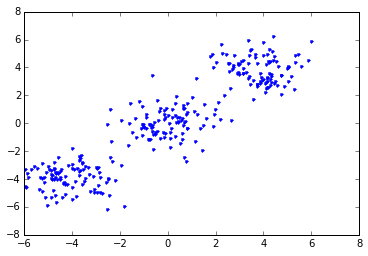

In [40]:
%matplotlib inline
plt.plot(X1, X2, '.')

In [23]:
x = np.hstack((X1, X2))
y = np.zeros((3*n, 3))
y[0:100, 0] = 1
y[100:200, 1] = 1
y[200:300, 2] = 1

In [28]:
yhat = x.dot(la.inv(x.T.dot(x))).dot(x.T).dot(y)

In [31]:
yhat1 = np.argmax(yhat, 1)

##Linear Discriminent analysis

In [56]:
mu1 = np.mean(x[0:100, :], axis = 0)
mu2 = np.mean(x[100:200, :], axis = 0)
mu3 = np.mean(x[200:300, :], axis = 0)

In [63]:
Sigma = (np.cov(x[0:100, :].T) + np.cov(x[100:200, :].T) + np.cov(x[200:, :].T))*99 / 297

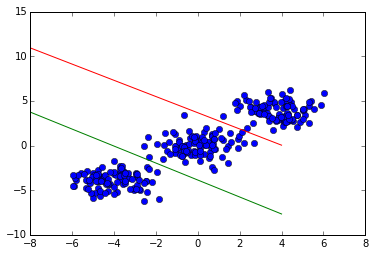

In [74]:
Delta = 0.5*(mu1.dot(la.inv(Sigma)).dot(mu1)) - 0.5*(mu2.dot(la.inv(Sigma)).dot(mu2))
t = la.inv(Sigma).dot(mu1 - mu2)
u = np.linspace(-8, 4, 100)
fu = (Delta - u*t[0])/t[1]
Delta1 = 0.5*(mu2.dot(la.inv(Sigma)).dot(mu2)) - 0.5*(mu3.dot(la.inv(Sigma)).dot(mu3))
t= la.inv(Sigma).dot(mu2 - mu3)
fu1 = (Delta1 - u*t[0])/t[1]
plt.plot(X1, X2, 'o')
plt.hold(True)
plt.plot(u, fu, '-')
plt.plot(u, fu1, '-')

##Verify B+W=T

In [76]:
T=np.cov(x.T)

In [79]:
W=Sigma